<a href="https://colab.research.google.com/github/BassemMagdi0007/Sentiment-analysis/blob/main/Models/%20Sentiment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##cleaning

In [ ]:
!pip install pyarabic

     |████████████████████████████████| 133kB 8.4MB/s 


In [ ]:
!pip install dtale

     |████████████████████████████████| 14.4MB 202kB/s 
     |████████████████████████████████| 194kB 53.0MB/s 
     |████████████████████████████████| 81kB 11.3MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 71kB 10.0MB/s 
     |████████████████████████████████| 20.6MB 153kB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 79.9MB 114kB/s 
     |████████████████████████████████| 1.8MB 25.8MB/s 
     |████████████████████████████████| 645kB 40.2MB/s 
     |████████████████████████████████| 1.0MB 33.6MB/s 
     |████████████████████████████████| 3.5MB 26.3MB/s 
     |████████████████████████████████| 92kB 12.4MB/s 
     |████████████████████████████████| 1.8MB 37.4MB/s 
     |████████████████████████████████| 358kB 52.4MB/s 
  Created wheel for dash: filename=dash-1.20.0-cp37-none-any.whl size=85845 sha256=b32ccd114337b1ebea924e5716849e49553750022dde391b00410c545593fe39
  Stored in directo

In [ ]:
import dtale
import dtale.app as dtale_app

dtale_app.USE_COLAB = True

In [ ]:
### The repository
!git clone https://github.com/BassemMagdi0007/Sentiment-analysis.git

Cloning into 'Sentiment-analysis'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 25 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [ ]:
import json
import pandas as pd
import html
import logging
import re
import pyarabic.araby as araby

In [ ]:
#### Please upload the dataset to colab before using this cell #####
train_sarcasm = pd.read_csv("ArSarcasm_train.csv")
test_sarcasm = pd.read_csv("ArSarcasm_test.csv")

sarcasm_df = pd.concat([train_sarcasm[['tweet','original_sentiment']],test_sarcasm[['tweet','original_sentiment']]],ignore_index=True)
sarcasm_df.rename(columns={"tweet":"text","original_sentiment":"label"},inplace=True)

In [ ]:
mazajk_df = pd.read_excel("40000-Egyptian-tweets.xlsx")
mazajk_df.columns = ['text','label']

In [ ]:
mazajk_df.head(5)

,text,label
0,اكبر خطا ترتكبه ان تعامل الناس باخلاقك انت مش ...,negative
1,دائما اكره اخر ليله في كل مكان .,negative
2,يارب اللى يسرق تويتاتى يدخل النار .,negative
3,الاسراف فى تناول القهوة يسبب الوفاه .,negative
4,انا اتبهدلت من التراب النهارده. حاجة تقرف .,positive


In [ ]:
url_regexes = [
    r"(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)",
    r"@(https?|ftp)://(-\.)?([^\s/?\.#-]+\.?)+(/[^\s]*)?$@iS",
    r"http[s]?://[a-zA-Z0-9_\-./~\?=%&]+",
    r"www[a-zA-Z0-9_\-?=%&/.~]+",
    r"[a-zA-Z]+\.com",
    r"(?=http)[^\s]+",
    r"(?=www)[^\s]+",
    r"://",
]

user_mention_regex = r"@[\w\d]+"
email_regexes = [r"[\w-]+@([\w-]+\.)+[\w-]+", r"\S+@\S+"]
redundant_punct_pattern = (
    r"([!\"#\$%\'\(\)\*\+,\.:;\-<=·>?@\[\\\]\^_ـ`{\|}~—٪’،؟`୍“؛”ۚ【»؛\s+«–…‘]{2,})"
)
regex_tatweel = r"(\D)\1{2,}"
rejected_chars_regex = r"[^0-9\a-zA-Z\[\]!\"#\$%\'\(\)\*\+,\.:;\-<=·>?@\[\\\]\^_ـ`{\|}~—٪’،؟`୍“؛”ۚ»؛\s+«–…‘]"

regex_url_step1 = r"(?=http)[^\s]+"
regex_url_step2 = r"(?=www)[^\s]+"
regex_url = r"(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)"
regex_mention = r"@[\w\d]+"
regex_email = r"\S+@\S+"

chars_regex = r"0-9\u0621-\u063A\u0640-\u066C\u0671-\u0674a-zA-Z\[\]!\"#\$%\'\(\)\*\+,\.:;\-<=·>?@\[\\\]\^_ـ`{\|}~—٪’،؟`୍“؛”ۚ»؛\s+«–…‘"

white_spaced_double_quotation_regex = r'\"\s+([^"]+)\s+\"'
white_spaced_single_quotation_regex = r"\'\s+([^']+)\s+\'"
white_spaced_back_quotation_regex = r"\`\s+([^`]+)\s+\`"
white_spaced_em_dash = r"\—\s+([^—]+)\s+\—"

left_spaced_chars = r" ([\]!#\$%\),\.:;\?}٪’،؟”؛…»·])"
right_spaced_chars = r"([\[\(\{“«‘*\~]) "
left_and_right_spaced_chars = r" ([\+\-\<\=\>\@\\\^\_\|\–]) "
replace_urls_emails_mentions=True
strip_tashkeel=True
strip_tatweel=True
insert_white_spaces=True
remove_elongation=True
remove_html_markup=True


def preprocess(text):
    """
    Preprocess takes an input text line an applies the same preprocessing used in AraBERT
                        pretraining
    Args:
        text (:obj:`str`): inout text string
    Returns:
        string: A preprocessed string depending on which model was selected
    """


    text = str(text)
    text = html.unescape(text)
    if strip_tashkeel:
        text = araby.strip_tashkeel(text)
    if strip_tatweel:
        text = araby.strip_tatweel(text)

    if replace_urls_emails_mentions:
        # replace all possible URLs
        for reg in url_regexes:
            text = re.sub(reg, " [رابط] ", text)
        # REplace Emails with [بريد]
        for reg in email_regexes:
            text = re.sub(reg, " [بريد] ", text)
        # replace mentions with [مستخدم]
        text = re.sub(user_mention_regex, " [مستخدم] ", text)        

    if remove_html_markup:
        # remove html line breaks
        text = re.sub("<br />", " ", text)
        # remove html markup
        text = re.sub("</?[^>]+>", " ", text)

    # remove repeated characters >2
    if remove_elongation:
        text = _remove_elongation(text)

    # insert whitespace before and after all non Arabic digits or English Digits and Alphabet and the 2 brackets
    if insert_white_spaces:
        text = re.sub(
            "([^0-9\u0621-\u063A\u0641-\u064A\u0660-\u0669a-zA-Z\[\]])",
            r" \1 ",
            text,
        )

        # insert whitespace between words and numbers or numbers and words
        text = re.sub(
            "(\d+)([\u0621-\u063A\u0641-\u064A\u0660-\u066C]+)", r" \1 \2 ", text
        )
        text = re.sub(
            "([\u0621-\u063A\u0641-\u064A\u0660-\u066C]+)(\d+)", r" \1 \2 ", text
        )


    # text = re.sub(rejected_chars_regex, " ", text)

    # remove extra spaces
    text = " ".join(text.replace("\uFE0F", "").split())

    # ALl the other models dont require Farasa Segmentation
    text = re.sub(r"[a-zA-Z]+", " ",text)
    text = re.sub("\d+","",text)
    text = re.sub("[┊┊•°°•´¸•´¨¸•¨¸•]"," ",text)
    text = re.sub("[ŁÀÁÂÃÄÅÆÇÈÉÊËÌÍÎÏÐÑÒÓÔÕÖØÙÚÛÜÝÞßïîíìëêéèçæåäãâáàðñòóôõöøùúûüýþÿďĎčČċĊĉĈćĆąĄăĂāĀĐđĒēĔĕĖėĘęĚěĜĝĞğįĭĬīĪĩĨħĦĥĤģĢġĠİıĲĳĴĵĶķĸĹĺĻļĽľĿŏŎōŌŋŊŉňņŅńŃłŁŀŐőŒœŔŕŖŗŘřŚśŜŝŞşůŮŭŬūŪũŨŧŦťŤţšŠŰűŲųŴŵŶŷŸŹźŻżŽžſ]"," ", text)
    text = re.sub(r'[[\]]+', " ", text)

    return text



def _remove_elongation(text):
    """
    :param text:  the input text to remove elongation
    :return: delongated text
    """
    # loop over the number of times the regex matched the text
    for index_ in range(len(re.findall(regex_tatweel, text))):
        elongation = re.search(regex_tatweel, text)
        if elongation:
            elongation_pattern = elongation.group()
            elongation_replacement = elongation_pattern[0]
            elongation_pattern = re.escape(elongation_pattern)
            text = re.sub(
                elongation_pattern, elongation_replacement, text, flags=re.MULTILINE
            )
        else:
            break
    return text

def _remove_redundant_punct(text):
    text_ = text
    result = re.search(redundant_punct_pattern, text)
    dif = 0
    while result:
        sub = result.group()
        sub = sorted(set(sub), key=sub.index)
        sub = " " + "".join(list(sub)) + " "
        text = "".join(
            (text[: result.span()[0] + dif], sub, text[result.span()[1] + dif :])
        )
        text_ = "".join(
            (text_[: result.span()[0]], text_[result.span()[1] :])
        ).strip()
        dif = abs(len(text) - len(text_))
        result = re.search(redundant_punct_pattern, text_)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

In [ ]:
#Apply the cleaning
sarcasm_df.text= sarcasm_df.text.apply(preprocess)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: FutureWarning:

Possible nested set at position 1



In [ ]:
#Replacing conditions
sarcasm_df.text = sarcasm_df.apply(lambda x : re.sub(r'"',"",x['text']),axis=1)
sarcasm_df.text = sarcasm_df.apply(lambda x : re.sub(r"[#]+"," هاشتاج ",x['text']),axis=1)
sarcasm_df.text = sarcasm_df.apply(lambda x : re.sub(r"[_|-|:|.|(|)|—]+"," ",x['text']),axis=1)

In [ ]:
dtale.show(sarcasm_df)

https://0ozmnm1dmi5-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

In [ ]:
#### If you want to use the ArSarcasm only ####
all_data = sarcasm_df

#### If you want to use all datasets #### 
####all_data = pd.concat([sarcasm_df,mazajk_df],ignore_index=True)

In [ ]:
all_data.label = all_data.label.map({"negative":"Negative","positive":"Positive","neutral":"Neutral"}.get)
all_data.label.value_counts()


Negative    4063
Neutral     3926
Positive    2558
Name: label, dtype: int64

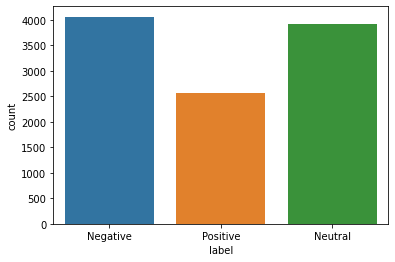

In [ ]:
import seaborn as sn
ax=sn.countplot(x="label", data=all_data)

In [ ]:
all_data.to_csv("CLeaned_data.csv",index=False)

##Imports

In [ ]:
!nvidia-smi

Thu Jul  1 16:09:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install transformers
# !pip install dtale

     |████████████████████████████████| 2.5MB 8.8MB/s 
     |████████████████████████████████| 3.3MB 51.5MB/s 
     |████████████████████████████████| 901kB 40.5MB/s 


In [ ]:
from transformers import BertForSequenceClassification, BertTokenizerFast, Trainer, TrainingArguments,AutoTokenizer
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import seaborn as sns
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModelForMaskedLM

# import dtale
# import dtale.app as dtale_app

# dtale_app.USE_COLAB = True
from tokenizers import Tokenizer
from tqdm import tqdm_notebook
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader


import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import metrics
from pprint import pprint
from sklearn.preprocessing import MultiLabelBinarizer
import tensorflow as tf
import tensorflow_hub as hub
import os, sys
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
from nltk.stem import WordNetLemmatizer
from nltk.corpus import names
import nltk


import os
import time
import gc
import random
import torch
from IPython.display import HTML


nltk.download('names')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re 
from nltk.corpus import stopwords

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
pip install kornia

     |████████████████████████████████| 296kB 8.3MB/s 
     |████████████████████████████████| 14.6MB 211kB/s 
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.19.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


**Models** :
we should really focus on what we use in tokenization and training as we have :


1.   UBC-NLP/MARBERT 
2.   cardiffnlp/twitter-xlm-roberta-base
3.   aubmindlab/bert-base-arabertv02





In [ ]:
model_name = ['UBC-NLP/MARBERT','cardiffnlp/twitter-xlm-roberta-base','aubmindlab/bert-base-arabertv02']

In [ ]:
# bert = AutoModel.from_pretrained('UBC-NLP/MARBERT')
#### Choose your model:
model_T=model_name[0]
# Load the BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_T)

2021-07-05 01:51:31,918 - INFO     - Lock 139834006539280 acquired on /root/.cache/huggingface/transformers/c3fd5ae192b6ecfac21e1ee10a127a4be3a8f11f15ba705dfbe28df91892907d.add0f663209440c3da3f309e22b445abb9a90c8572bbe49423f50103baf5ab17.lock


2021-07-05 01:51:32,249 - INFO     - Lock 139834006539280 released on /root/.cache/huggingface/transformers/c3fd5ae192b6ecfac21e1ee10a127a4be3a8f11f15ba705dfbe28df91892907d.add0f663209440c3da3f309e22b445abb9a90c8572bbe49423f50103baf5ab17.lock


2021-07-05 01:51:32,532 - INFO     - Lock 139834019909712 acquired on /root/.cache/huggingface/transformers/149fd0f2228ba9e18736429c365b97eb4a2af1c198b1e068b99815d78d3d9e25.897c52772d161fa08b3d031e0e548347e8ae1f81959cd6e58ccf096423ca5a11.lock


2021-07-05 01:51:32,848 - INFO     - Lock 139834019909712 released on /root/.cache/huggingface/transformers/149fd0f2228ba9e18736429c365b97eb4a2af1c198b1e068b99815d78d3d9e25.897c52772d161fa08b3d031e0e548347e8ae1f81959cd6e58ccf096423ca5a11.lock


2021-07-05 01:51:33,147 - INFO     - Lock 139834007960336 acquired on /root/.cache/huggingface/transformers/c1d67f93c84050eb506184e5625d53c4946bd98af9c62ad1ee92d4db1559105a.9985cd6ca030442c4f68221160381b229fee63902f75a8f43e14e78007536585.lock


2021-07-05 01:51:33,793 - INFO     - Lock 139834007960336 released on /root/.cache/huggingface/transformers/c1d67f93c84050eb506184e5625d53c4946bd98af9c62ad1ee92d4db1559105a.9985cd6ca030442c4f68221160381b229fee63902f75a8f43e14e78007536585.lock


2021-07-05 01:51:34,644 - INFO     - Lock 139834006129424 acquired on /root/.cache/huggingface/transformers/6826635eba590bd92524e8730921a4029f540c03dbc23e3630c38d49b85b2d0d.dd8bd9bfd3664b530ea4e645105f557769387b3da9f79bdb55ed556bdd80611d.lock


2021-07-05 01:51:34,979 - INFO     - Lock 139834006129424 released on /root/.cache/huggingface/transformers/6826635eba590bd92524e8730921a4029f540c03dbc23e3630c38d49b85b2d0d.dd8bd9bfd3664b530ea4e645105f557769387b3da9f79bdb55ed556bdd80611d.lock


##Model

In [ ]:
train = pd.read_csv("/content/CLeaned_data.csv")
train.columns = ['text','sentiment']
train.dropna(inplace=True)

In [ ]:
train.sentiment.value_counts()

Negative    4063
Neutral     3926
Positive    2558
Name: sentiment, dtype: int64

In [ ]:
class_name = ['Negative','Positive','Neutral']
train.sentiment = train.sentiment.map({'Negative':0,'Positive':1,"Neutral":2})

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
train.sentiment.value_counts()

0    4063
2    3926
1    2558
Name: sentiment, dtype: int64

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



MAX LENGTH:  120


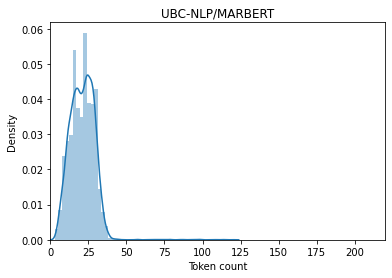

In [ ]:
import matplotlib.pyplot as plt

token_lens = []
for txt in train.text:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))
sns.distplot(token_lens)
plt.xlim([0, 220]);
plt.title(model_T)
plt.xlabel('Token count');
print("MAX LENGTH: ",max(token_lens))

In [ ]:
MAX_LEN = max(token_lens)

In [ ]:
class GPReviewDataset(Dataset):
  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  def __len__(self):
    return len(self.reviews)
  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]
    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )
    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [ ]:
df_train, df_test = train_test_split(
  train,
  test_size=0.3,
  random_state= np.random.seed(1234),
)
df_val, df_test = train_test_split(
  df_test,
  test_size=0.5,
  random_state= np.random.seed(1234),
)

In [ ]:
print(len(df_train))
print(len(df_val))
print(len(df_test))

7382
1582
1583


In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews=df.text.to_numpy(),
    targets=df.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )
  return DataLoader(
    ds,
    batch_size=batch_size,
    shuffle=True
  )

def create_test_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews=df.text.to_numpy(),
    targets=df.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )
  return DataLoader(
    ds,
    batch_size=batch_size,
  )

In [ ]:
def create_loader(BATCH_SIZE):

  train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
  val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
  test_data_loader = create_test_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

  return train_data_loader,val_data_loader, test_data_loader

In [ ]:
############ we have three models and we should take the same as in the tokenization phase Or model_T is global variable ################
#### Model_name = ['UBC-NLP/MARBERT','cardiffnlp/twitter-xlm-roberta-base','aubmindlab/bert-base-arabertv02']

PRE_TRAINED_MODEL_NAME= model_T

In [ ]:
## BERT With MLP

class SentimentClassifier(nn.Module):
  def __init__(self, n_classes,drop_value):
    super(SentimentClassifier, self).__init__()
    self.bert = AutoModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=drop_value)
    self.out = nn.Sequential(
            nn.Linear(self.bert.config.hidden_size, 50),
            nn.ReLU(),
            nn.Linear(50, n_classes)
        )

  def forward(self, input_ids, attention_mask):
    dect_= self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(dect_['pooler_output'])
    return self.out(output)

In [ ]:
model = SentimentClassifier(len(class_name),0.3)
model = model.to(device)

2021-07-05 01:52:47,119 - INFO     - Lock 139834002508112 acquired on /root/.cache/huggingface/transformers/d2c40ae07966159d912382ac272d518da4833484bbb486d4af85adb250ff3702.3f1282b471bf663bd7cc69cf2161fb3a56e95efa917842b75be8301a8c58ce1c.lock


2021-07-05 01:53:00,394 - INFO     - Lock 139834002508112 released on /root/.cache/huggingface/transformers/d2c40ae07966159d912382ac272d518da4833484bbb486d4af85adb250ff3702.3f1282b471bf663bd7cc69cf2161fb3a56e95efa917842b75be8301a8c58ce1c.lock


Some weights of the model checkpoint at UBC-NLP/MARBERT were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
import kornia
from  kornia import losses

In [ ]:
from typing import Optional

import torch
import torch.nn as nn
import torch.nn.functional as F

from kornia.utils.one_hot import one_hot


def linear_combination(x, y):
  smoothing = 0.1
  return smoothing * x + (1 - smoothing) * y


def reduce_loss(loss):
  reduction = 'mean'
  return loss.mean() if reduction == 'mean' else loss.sum() \
    if reduction == 'sum' else loss


def focal_loss(
        input: torch.Tensor,
        target: torch.Tensor,
        alpha: float,
        gamma: float = 2.0,
        reduction: str = 'none',
        eps: float = 1e-8) -> torch.Tensor:

    if not isinstance(input, torch.Tensor):
        raise TypeError("Input type is not a torch.Tensor. Got {}"
                        .format(type(input)))

    if not len(input.shape) >= 2:
        raise ValueError("Invalid input shape, we expect BxCx*. Got: {}"
                         .format(input.shape))

    if input.size(0) != target.size(0):
        raise ValueError('Expected input batch_size ({}) to match target batch_size ({}).'
                         .format(input.size(0), target.size(0)))

    n = input.size(0)
    num_classes=input.shape[1]
    out_size = (n,) + input.size()[2:]
    if target.size()[1:] != input.size()[2:]:
        raise ValueError('Expected target size {}, got {}'.format(
            out_size, target.size()))

    if not input.device == target.device:
        raise ValueError(
            "input and target must be in the same device. Got: {} and {}" .format(
                input.device, target.device))

    # compute softmax over the classes axis
    input_soft: torch.Tensor = F.softmax(input, dim=1) + eps

    loss_soft = reduce_loss(-input_soft.sum(dim=-1))
    # create the labels one hot tensor
    target_one_hot: torch.Tensor = one_hot(
        target, num_classes=input.shape[1],
        device=input.device, dtype=input.dtype)

    # compute the actual focal loss
    weight = torch.pow(-input_soft + 1., gamma)

    focal = -alpha * weight * torch.log(input_soft)
    loss_tmp = torch.sum(target_one_hot * focal, dim=1)
    if reduction == 'none':
        loss = loss_tmp
    elif reduction == 'mean':
        loss = torch.mean(loss_tmp)
    elif reduction == 'sum':
        loss = torch.sum(loss_tmp)
    else:
        raise NotImplementedError("Invalid reduction mode: {}"
                                  .format(reduction))
    return linear_combination(loss_soft / num_classes, loss)


class FocalLoss(nn.Module):

    def __init__(self, alpha: float, gamma: float = 2.0,
                 reduction: str = 'none', eps: float = 1e-8) -> None:
        super(FocalLoss, self).__init__()
        self.alpha: float = alpha
        self.gamma: float = gamma
        self.reduction: str = reduction
        self.eps: float = eps

    def forward(self, input: torch.Tensor, target: torch.Tensor) -> torch.Tensor:
        return focal_loss(input, target, self.alpha, self.gamma, self.reduction, self.eps)

In [ ]:
def optimization(learning_rate,EPOCHS,model,train_data_loader,num_warmup_steps):

  optimizer = AdamW(model.parameters(),lr=learning_rate ,correct_bias=True)
  total_steps = len(train_data_loader) * EPOCHS
  scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps = num_warmup_steps,
    num_training_steps=total_steps
  )
  loss_fn = FocalLoss(alpha=0.5, gamma=2.0, reduction='mean')

  return optimizer, scheduler, loss_fn

In [ ]:
def train_epoch(
  model,
  data_loader,
  loss_fn,
  optimizer,
  device,
  scheduler,
  n_examples
):
  model = model.train()
  losses = []
  correct_predictions = 0
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)
    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()
  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()
  losses = []
  correct_predictions = 0
  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, targets)
      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())
  return correct_predictions.double() / n_examples, np.mean(losses)

## Training 

In [ ]:
def run_epochs():
  history = defaultdict(list)
  best_accuracy = 0

  config_defaults = {
  'epochs': 2,
  'BATCH_SIZE': 16,
  'learning_rate': 1e-5,
  'dropout':0.3,
  'num_warmup_steps' : 5,
  'seed': 42
  }
  # wandb.init(config=config_defaults)

  # config = wandb.config

  model = SentimentClassifier(len(class_name),config_defaults['dropout'])
  model = model.to(device)
  

  train_data_loader, val_data_loader, test_data_loader = create_loader(config_defaults['BATCH_SIZE'])

  optimizer,scheduler, loss_fn =  optimization(config_defaults['learning_rate'], config_defaults['epochs'],model,train_data_loader,config_defaults['num_warmup_steps'])

  for epoch in tqdm_notebook(range(config_defaults['epochs'])):
    # print(f'Epoch {epoch + 1}/{config_defaults.epochs}')
    # print('-' * 10)
    train_acc, train_loss = train_epoch(
      model,
      train_data_loader,
      loss_fn,
      optimizer,
      device,
      scheduler,
      len(df_train)
    )
    # wandb.log({"Train loss": train_loss})
    # wandb.log({"train_accuracy": train_acc})
    print(f'Train loss {train_loss} accuracy {train_acc}')
    val_acc, val_loss = eval_model(
      model,
      val_data_loader,
      loss_fn,
      device,
      len(df_val)
    )
    # wandb.log({"Val loss": val_loss})
    # wandb.log({"val_accuracy": val_acc})
    print(f'Val loss {val_loss} accuracy {val_acc}')
    print()
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    
    if val_acc > best_accuracy:
      torch.save(model.state_dict(), 'best_model_state.bin')
      best_accuracy = val_acc
    

  return model, train_data_loader, val_data_loader, test_data_loader, optimizer, scheduler, loss_fn ,history,epoch

In [ ]:
model, train_data_loader, val_data_loader, test_data_loader, optimizer, scheduler, loss_fn ,history,epoch = run_epochs()

Some weights of the model checkpoint at UBC-NLP/MARBERT were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.noteb

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Train loss 0.11269054490089159 accuracy 0.6331617447846113
Val loss 0.0785746370075327 accuracy 0.7300884955752213

Train loss 0.05798812922961139 accuracy 0.7812246003793011
Val loss 0.07648685484221487 accuracy 0.7402022756005058




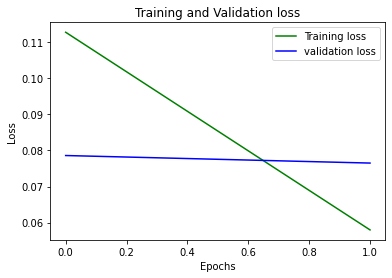

In [ ]:
loss_train = history['train_loss']
loss_val = history['val_loss']
epochs = range(0,2)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

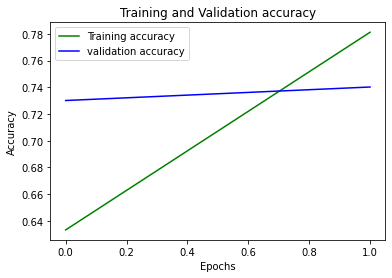

In [ ]:
loss_train = history['train_acc']
loss_val = history['val_acc']
epochs = range(0,2)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Prediction

In [ ]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)
test_acc.item()

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



0.7308907138344914

In [ ]:
from tqdm import tqdm_notebook
def get_predictions(model, data_loader):
  model = model.eval()
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []
  with torch.no_grad():
    for d in tqdm_notebook(data_loader):
      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
      real_values.extend(targets)
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs,real_values

In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



In [ ]:
print(classification_report(y_test, y_pred, target_names=class_name))

              precision    recall  f1-score   support

    Negative       0.79      0.82      0.81       583
    Positive       0.73      0.71      0.72       402
     Neutral       0.67      0.65      0.66       598

    accuracy                           0.73      1583
   macro avg       0.73      0.73      0.73      1583
weighted avg       0.73      0.73      0.73      1583



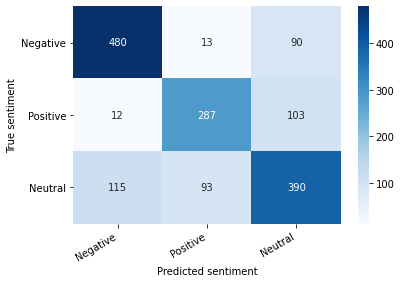

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_name, columns=class_name)
show_confusion_matrix(df_cm)

In [ ]:

# test = pd.read_csv('/content/test_version3_1.csv')
# dashboard_nostopwords.rename(columns={"Text":"text"},inplace=True)
# dashboard_nostopwords['sentiment'] = 0
# dashboard_nostopwords['prob'] = 0
# dashboard_nostopwords['all_prob'] = 0
# test_dash_no_stopwords = create_test_data_loader(dashboard_nostopwords, tokenizer, MAX_LEN, 16)

# y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
#   model,
#   test_dash_no_stopwords,
# )

# dashboard_nostopwords['sentiment'] = y_pred.numpy().tolist() 


# m = nn.Softmax(dim=1)
# soft_prob = m(y_pred_probs)
# prob_list = [i.max().item() for i in soft_prob]
# dashboard_nostopwords['prob'] = prob_list

# prob_list_lamo = [i for i in soft_prob]
# dashboard_nostopwords['all_prob'] = prob_list_lamo


# dashboard_nostopwords.sentiment = dashboard_nostopwords.sentiment.apply({1:"Positive", 0:'Negative', 2:"Neutral"}.get)

#interpretability

In [ ]:
pip install transformers-interpret


In [ ]:
# model = SentimentClassifier(3,0.3)
# model = model.to(device)
# optimizer = AdamW(model.parameters(), lr=1e-5, correct_bias=True)

In [ ]:
# output_model ="/content/best_model_state.bin"
# checkpoint = torch.load(output_model, map_location='cuda')
# model.load_state_dict(checkpoint)

<All keys matched successfully>

In [ ]:
import transformers_interpret

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
model = AutoModelForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL_NAME)
tokenizer = AutoTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

# With both the model and tokenizer initialized we are now able to get explanations on an example text.
from transformers_interpret import SequenceClassificationExplainer
cls_explainer = SequenceClassificationExplainer(
    model,
    tokenizer)


Some weights of the model checkpoint at UBC-NLP/MARBERT were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at U

In [ ]:
test_data_loader.dataset.reviews


array(['حين نناقش قرار للحكومة نتحيز له بحجة   بلاد بره كلها بتنام بدري ، تيجي لاطلاق حرية العقيدة   احنا مالنا ببلاد برة ؟',
       'امل محمود فى ذمة اللهرحلة عطاء ومقاومة باسلة ستبقى فخرا لجيلنالهم اجزها خيرا عنا وبواسع رحمتك ادخلها واسع جنتك',
       ' الله يرحمك يا جبران تويني   سنة يا صديقي وبعدك بالبال رجل كلمته حرة   وبعد بالبال آخر لقاء لنا ضحكنا ع ردة فعل جان لويس قرداحي امام مي شدياق ',
       ...,
       ' بريد  او ارقام ص 😂 بابا رندفو او انه امثل علينا قدام الكاميرات انه ها شفوني 😂 والله يا اوباما مخلغين اسنان هي اسوالف 😂 ',
       '  هاشتاج  ماذا   لو   المدارس   مختلطهماقدر اقول انه مرة بيكون مافي فساد لا في فساد بس اعتقد بيكون اقل من اللي صاير الحين بكثير الكثير ',
       '    مستخدم    الرئيسة  هاشتاج  مريم   رجوي و  هاشتاج  حقوق   الانسان في  هاشتاج  إيران مرة ثانية و ثالثة    هاشتاج  الشرق   الاوسط  هاشتاج  الخليج  رابط   رابط  … '],
      dtype=object)

In [ ]:
word_attributions = cls_explainer(' نصيحه ما عمرك اتنزل لعبة سوبر ماريو مش زي ما كنا متوقعين الله يرحم ايامات السيقا والفاميلي  هاشتاج    ')


In [ ]:
cls_explainer.predicted_class_name

'LABEL_1'

In [ ]:
word_attributions

[('[CLS]', 0.0),
 ('نصيحه', 0.31049687322924596),
 ('ما', -0.0940963087182733),
 ('عمرك', 0.1496471540513533),
 ('اتن', -0.056256693599998416),
 ('##زل', 0.17964540714974012),
 ('لعبة', 0.0588831741864531),
 ('سوبر', 0.2385921969670655),
 ('ماريو', 0.529753687576644),
 ('مش', 0.3796879565919899),
 ('زي', -0.14531850493236484),
 ('ما', 0.19315624421042918),
 ('كنا', -0.1450580732439705),
 ('متوقعين', 0.054299469075056554),
 ('الله', -0.0039594632014838),
 ('يرحم', -0.09964191437649123),
 ('اياما', 0.37781011615851284),
 ('##ت', 0.11287508996017218),
 ('السي', 0.08296992125396943),
 ('##قا', -0.25392096744933546),
 ('والفا', 0.1548009375609719),
 ('##ميلي', -0.0856401016053971),
 ('هاشتاج', -0.03479480827697338),
 ('[SEP]', 0.0)]

In [ ]:
train['text'][0]

' نصيحه ما عمرك اتنزل لعبة سوبر ماريو مش زي ما كنا متوقعين الله يرحم ايامات السيقا والفاميلي  هاشتاج    '

In [ ]:
cls_explainer.visualize("distilbert_viz.html")
